# Análise Ranking CCONF

Neste notebook vamos analisar a aba municípios da planilha que contém os dados sobre a aplicação dos critérios 
elaborados pela CCONF. Previamente, juntamos a lista de municípios que tiveram CAPAG analisada e 
concluída pela GERAP/CORFI em 2020 (coluna "capag_analis"= True) a estes dados,  bem como a lista de municípios que tiveram 
operação de crédito aprovada em 2020 (coluna "oper_aprov" = True), de forma que a análise poderá ser feita na lista completa
de municípios da CCONF ou em um destes dois subgrupos. 

Vamos lá!

## Preparação: importando os dados da planilha
Começamos importando os dados da planilha para dentro de um Data Frame para podermos manipulá-los no python:

Vamos criar duas variáveis que guardam as colunas que: 
a) São relacionadas à capag:
b) Não são relacionadas à capag

In [18]:
col_capag = "BV, BZ,S:W, Y:AA, AL:AN, AS, AU: BA, BD:BF, BM, BO, BQ, BS, BU, CB, CC"
col_nao_capag = "BV, BZ, B:R,X,AB:AK, AO:AR, AT, BB:BC, BG:BL, BN, BP, BR, BT, CB, CC"
col_gerais = "A,BV, BW,BX,BY,BZ, CA, CB, CC"
col_id = "A"

Criando os Data Frames usando a library pandas

In [19]:
import pandas as pd
import numpy as np

data_capag = pd.read_excel(r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols =  col_capag , skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"] )
print(data_capag.dtypes)
print(data_capag.shape)
#print(data_capag.head(5))

data_nao_capag = pd.read_excel(r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols =  col_nao_capag , skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
print(data_nao_capag.dtypes)
print(data_nao_capag.shape)
#print(data_nao_capag.head(5))

data_total = pd.read_excel(r'C:\Users\fioro\PycharmProjects\ranking_cconf\assets\Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols = col_nao_capag + col_capag, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
print(data_total.dtypes)
print(data_total.shape)
#print(data_total.head(5))

D2_00003         int64
D2_00004         int64
D2_00005         int64
D2_00006         int64
D2_00007         int64
D2_00010         int64
D2_00011         int64
D2_00012         int64
D2_00023         int64
D2_00024         int64
D2_00028         int64
D2_00033         int64
D3_00002         int64
D3_00003         int64
D3_00005         int64
D3_00006         int64
D3_00007         int64
D3_00008         int64
D3_00009         int64
D3_00012         int64
D3_00013         int64
D4_00001         int64
D4_00008         int64
D4_00010         int64
D4_00012         int64
D4_00014         int64
D4_00016         int64
Ente            object
UF              object
oper_aprov        bool
capag_analis      bool
dtype: object
(5568, 31)
D1_00001        float64
D1_00002          int64
D1_00003        float64
D1_00004        float64
D1_00005          int64
D1_00006        float64
D1_00007          int64
D1_00008        float64
D1_00009        float64
D1_00010          int64
D1_00011        float6

## Escolha o conjunto de dados que quer usar na variável abaixo:

0 = Lista completa com 5568 municípios
1 = Lista de 45 municípios que tiveram CAPAG analisada e concluída pela GERAP/CORFI em 2020 (coluna "capag_analis"= True)
2 - lista de 102 municípios que tiveram  operação de crédito aprovada em 2020 (coluna "oper_aprov" = True)

In [20]:
conjunto_dados = 0

if conjunto_dados == 1:
        data_capag_analis= data_capag[data_capag['capag_analis']== True]
        data_nao_capag_analis = data_nao_capag[data_nao_capag['capag_analis']== True]
        data_total_analis= data_total[data_total['capag_analis']== True]
        data_capag = data_capag_analis
        data_nao_capag = data_nao_capag_analis
        data_total = data_total_analis
        print('Você escolheu trabalhar com a lista de 45 municípios que tiveram CAPAG analisada e concluída')
elif conjunto_dados == 2:
        data_capag_aprov = data_capag[data_capag['oper_aprov']== True]
        data_nao_capag_aprov = data_nao_capag[data_nao_capag['oper_aprov']== True]
        data_total_aprov= data_total[data_total['oper_aprov']== True]
        data_capag = data_capag_aprov
        data_nao_capag = data_nao_capag_aprov
        data_total = data_total_aprov
       
        print('Você escolheu trabalhar com a lista de 102 municípios que tiveram  operação de crédito aprovada')
else:
        print('Você escolheu trabalhar com a lista completa')

Você escolheu trabalhar com a lista de 102 municípios que tiveram  operação de crédito aprovada


## Análise Exploratória
Antes de tudo, vamos criar uma função para calcular a função de distribuição acumulada, ela será útil para entendermos a dinâmica de como os entes passam ou não em cada grupo de testes

In [21]:
def ecdf(data):
    """Calcular a função de distribuição cumulativa (FDC) for a one-dimensional array of measurements."""
    # Número de pontos de dados: n
    n = len(data)
    # dados do eixo X para o FDC : x
    x = np.sort(data)
    # dados do eixo y para o FDC: y
    y = np.arange(1, n+1) / n
    return x, y

a.	Qual a média/proporção de cada um dos testes?

In [22]:
medias_total = data_total.mean(axis=0)
print(medias_total)

D1_00001        1.000000
D1_00002        0.980392
D1_00003        1.000000
D1_00004        0.990196
D1_00005        0.000000
                  ...   
D4_00014        0.754902
D4_00015             NaN
D4_00016        0.735294
oper_aprov      1.000000
capag_analis    0.186275
Length: 74, dtype: float64


a.1	Qual a média/proporção de cada um dos testes não capag?

In [23]:
medias_ncapag = data_nao_capag.mean(axis=0)
print(medias_ncapag)

D1_00001        1.000000
D1_00002        0.980392
D1_00003        1.000000
D1_00004        0.990196
D1_00005        0.000000
D1_00006        0.644118
D1_00007        0.764706
D1_00008        0.673529
D1_00009        0.664706
D1_00010        0.000000
D1_00011        0.868627
D1_00012        0.949020
D1_00013        0.819608
D1_00014        0.937255
D1_00015        0.000000
D2_00001        0.764706
D2_00002        0.519608
D2_00008        0.960784
D2_00013        0.901961
D2_00014        0.950980
D2_00015        0.960784
D2_00016             NaN
D2_00017             NaN
D2_00018             NaN
D2_00019        0.950980
D2_00020             NaN
D2_00021             NaN
D2_00022        0.892157
D2_00029        0.882353
D2_00030        0.911765
D2_00031        0.872549
D2_00032        0.274510
D3_00001        0.588235
D3_00010        0.754902
D3_00011        0.764706
D4_00002        0.637255
D4_00003        0.627451
D4_00004        0.803922
D4_00005        0.431373
D4_00006        0.431373


a.1	Qual a média/proporção de cada um dos testes  capag?

In [24]:
medias_capag = data_capag.mean(axis=0)
print(medias_capag)

D2_00003        0.931373
D2_00004        0.941176
D2_00005        0.950980
D2_00006        0.960784
D2_00007        0.960784
D2_00010        0.960784
D2_00011        0.960784
D2_00012        0.852941
D2_00023        0.950980
D2_00024        0.950980
D2_00028        0.931373
D2_00033        0.911765
D3_00002        0.813725
D3_00003        0.833333
D3_00005        0.941176
D3_00006        0.500000
D3_00007        0.725490
D3_00008        0.549020
D3_00009        0.588235
D3_00012        0.980392
D3_00013        0.852941
D4_00001        0.754902
D4_00008        0.764706
D4_00010        0.725490
D4_00012        0.607843
D4_00014        0.754902
D4_00016        0.735294
oper_aprov      1.000000
capag_analis    0.186275
dtype: float64


b.	Qual a distribuição das notas (somatório de todas as colunas)?
i.	Levando em consideração apenas os testes da CAPAG (colunas em amarelo)

5       28.0
23      27.0
35      28.0
87      28.0
122     27.0
        ... 
4544    17.0
4722     9.0
4733     6.0
4981     7.0
5062     8.0
Name: sum, Length: 102, dtype: float64


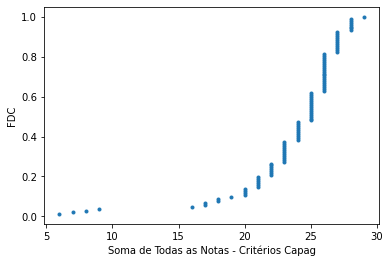

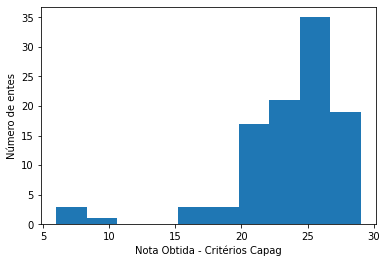

In [25]:
if "sum" in data_capag:
     data_capag["sum"].values[:] = 0
data_capag["sum"] = data_capag.sum(axis=1)
print(data_capag["sum"])
#Plotando a  função de distribuição cumulativa (FDC): vamos gerar as variáveis  x_dist, y_dist. A primeira terá 
#todas as notas acumuladas, da menor até a maior. 
import matplotlib.pyplot as plt
x_dist, y_dist = ecdf(data_capag['sum'])
# Greando o plot
_= plt.plot(x_dist, y_dist, marker = ".", linestyle = 'none')
# Rotulando os eixos
_= plt.xlabel('Soma de Todas as Notas - Critérios Capag')
_= plt.ylabel('FDC')
# Mostrando o plot
plt.show()
#plotando o histograma da coluna das notas
_=plt.hist(data_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
ii.	Levando em consideração apenas os testes que não são da CAPAG (colunas não pintadas)

5       33.4
23      33.8
35      32.6
87      31.6
122     32.0
        ... 
4544    20.1
4722    11.0
4733    15.7
4981     9.5
5062     9.7
Name: sum, Length: 102, dtype: float64


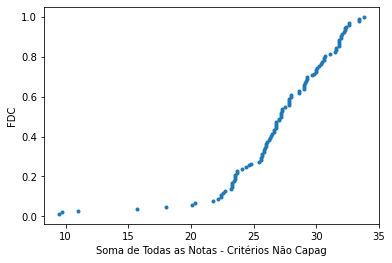

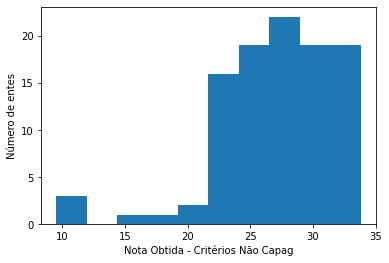

In [26]:
if "sum" in data_nao_capag:
     data_nao_capag["sum"].values[:] = 0
data_nao_capag["sum"] = data_nao_capag.sum(axis=1)
print(data_nao_capag["sum"])

#Plotando a  função de distribuição cumulativa (FDC): vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt
x_dist_nc, y_dist_nc = ecdf(data_nao_capag['sum'])
_= plt.plot(x_dist_nc, y_dist_nc, marker = ".", linestyle = 'none')
_= plt.xlabel('Soma de Todas as Notas - Critérios Não Capag')
_= plt.ylabel('FDC')
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_nao_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Não Capag')
_=plt.ylabel('Número de entes')
plt.show()




b.	Qual a distribuição das notas (somatório de todas as colunas)?
iii.	Levando em consideração todos os testes

5       60.4
23      59.8
35      59.6
87      58.6
122     58.0
        ... 
4544    36.1
4722    19.0
4733    19.7
4981    15.5
5062    15.7
Name: sum, Length: 102, dtype: float64


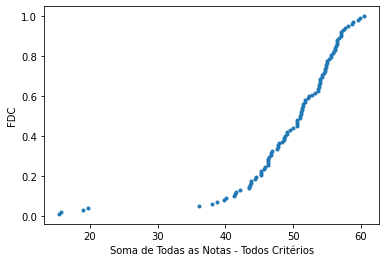

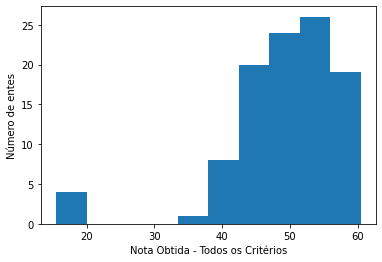

In [27]:
if "sum" in data_total:
     data_total["sum"].values[:] = 0
data_total["sum"] = data_total.sum(axis=1)
print(data_total["sum"])

#Plotando a função de distribuição cumulativa (FDC): vamos gerar as variáveis  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 
import matplotlib.pyplot as plt
x_dist_total, y_dist_total = ecdf(data_total['sum'])
_= plt.plot(x_dist_total, y_dist_total, marker = ".", linestyle = 'none')
_= plt.xlabel('Soma de Todas as Notas - Todos Critérios')
_= plt.ylabel('FDC')
plt.show()
#plotando o histograma da coluna das notas
_=plt.hist(data_total['sum'])
_=plt.xlabel('Nota Obtida - Todos os Critérios')
_=plt.ylabel('Número de entes')
plt.show()

## Simulações de classificação 
Vamos agora realizar 3 tipos de simulações. 

### a.	Alternativa I: classificação conjunta em duas etapas

#### i.	Primeiro,  somando todos os testes relacionados à CAPAG

##### i.	1.	Caso o município tenha resultado maior ou igual a x, classifique-o na zona 1

In [28]:
#>>>>> ALTERE A VARIÁVEL ABAIXO e pressione "CTRL + ENTER" para simular com outra nota de corte.
nota_corte_capag = 24

if 'Aprovado' in data_capag:
     data_capag['Aprovado'].values[:] = 0

#Gerando a coluna com os aprovados 

data_capag['Aprovado'] = np.where(data_capag["sum"]>= nota_corte_capag, True, False)
#print(data_capag['Aprovado'].head(200))

# Calculando o percentual de aprovados 
n_entes = data_capag.shape[0]
print('Total de Entes :' + str(n_entes))
num_aprovados = sum(data_capag['Aprovado'])
print('O número de entes de aprovados na zona 1 com nota de corte de ' + str(nota_corte_capag) + ' seria de: ' + str(num_aprovados))
print('O percentual de aprovados na zona 1 seria de : ' + "{:.2%}".format(num_aprovados/n_entes))

Total de Entes :102
O número de entes de aprovados na zona 1 com nota de corte de 24 seria de: 64
O percentual de aprovados na zona 1 seria de : 62.75%


#### ii.	Somando os testes não relacionados à CAPAG
##### 1.	Se o ente estiver na zona 1
    a.	Caso o ente tenha resultado maior ou igual a y1, classifique-o com nota final A
    b.	Caso o ente tenha resultado maior ou igual a y2 e menor que y1, classifique-o com nota final B
    c.	Caso o ente tenha resultado menor que y3, classifique-o com nota final C (erro: tenha resultado menor do que y2)
##### 2.	Se o ente estiver na zona 2
    a.	Caso o ente tenha resultado maior ou igual a y3, classifique-o com nota final D
    b.	Caso o ente tenha resultado menor que y3, classifique-o com nota final E

In [29]:
# Selecionando a coluna dos aprovados/reprovados na zona 1
df_aprovados = data_capag.Aprovado
# Trazendo a coluna dos aprovados nos critérios de Capag (zona 1) para o Data Frame que contém os critérios não relacionados à Capag 
data_nao_capag_c_a = pd.concat([data_nao_capag, df_aprovados], axis=1)
#verificando a concatenação
data_nao_capag_c_a.columns
print(data_nao_capag_c_a.head(3))
# calculando a nota dos critérios não capag
#>>>> ALETERE OS VALORES ABAIXO para simular com outras notas de CORTE
nota_corte_y1 = 28
nota_corte_y2 = 20
nota_corte_y3 = 15

# criando a lista das 5 condições
conditions = [
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y1),
    (data_nao_capag_c_a['Aprovado'] ) & ((data_nao_capag_c_a['sum'] < nota_corte_y1) & (data_nao_capag_c_a['sum'] >= nota_corte_y2)),
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] <  nota_corte_y2),        
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y3),
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] < nota_corte_y3)
    ]
# criando a lista de valores que queremos associar a cada condição
values = ['A', 'B', 'C', 'D', 'E']

if 'capag' in data_nao_capag_c_a:
     data_nao_capag_c_a['capag'].values[:] = 0

# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
data_nao_capag_c_a['capag'] = np.select(conditions, values)


    D1_00001  D1_00002  D1_00003  D1_00004  D1_00005  D1_00006  D1_00007  \
5        1.0         1       1.0       1.0         0       1.0         1   
23       1.0         1       1.0       1.0         0       1.0         1   
35       1.0         1       1.0       1.0         0       0.8         1   

    D1_00008  D1_00009  D1_00010  ...  D4_00009  D4_00011  D4_00013  D4_00015  \
5        1.0       1.0         0  ...       NaN       NaN       NaN       NaN   
23       1.0       1.0         0  ...       NaN       NaN       NaN       NaN   
35       1.0       1.0         0  ...       NaN       NaN       NaN       NaN   

               Ente  UF  oper_aprov  capag_analis   sum  Aprovado  
5    Belo Horizonte  MG        True         False  33.4      True  
23    Caxias do Sul  RS        True         False  33.8      True  
35  Doutor Pedrinho  SC        True         False  32.6      True  

[3 rows x 51 columns]


In [30]:
# Mostrando a Tabela final com a classificação
#data_nao_capag_c_a.head(10)
#Mostrando a quantidade de entes em cada classe de nota por estado
class_alt1 = data_nao_capag_c_a.groupby(['UF', 'capag']).size().to_frame('size').reset_index().sort_values(['UF', 'capag'], ascending=[True, True])
print(class_alt1)
# Mostrando a quantidade de entes por UF
#uf = data_nao_capag_c_a.groupby(['UF']).size().to_frame('size')
#print (uf)
# Fazendo a divisão final para mostrar as notas por UF em termos percentuais. 
c = data_nao_capag_c_a.groupby(['UF', 'capag']).size().to_frame('size')
class_alt1_final = c / c.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 1 - Percentuais por Estado

print (class_alt1_final)

    UF capag  size
0   AM     A     1
1   BA     A     1
2   BA     D     5
3   CE     A     4
4   CE     B     2
5   CE     D     1
6   ES     A     1
7   ES     D     1
8   MA     B     1
9   MG     A     2
10  MG     B     2
11  MG     D     5
12  MG     E     2
13  MS     B     1
14  MS     D     1
15  PA     A     1
16  PA     B     1
17  PB     D     2
18  PB     E     1
19  PI     B     2
20  PI     D     1
21  PR     A     4
22  PR     B     2
23  PR     D     5
24  RJ     B     1
25  RJ     D     3
26  RN     D     1
27  RR     D     1
28  RS     A     9
29  RS     D     3
30  SC     A    15
31  SC     B     3
32  SC     D     1
33  SP     A     1
34  SP     B     9
35  SP     D     3
36  TO     B     1
37  TO     D     2
              size
UF capag          
AM A      1.000000
BA A      0.166667
   D      0.833333
CE A      0.571429
   B      0.285714
   D      0.142857
ES A      0.500000
   D      0.500000
MA B      1.000000
MG A      0.181818
   B      0.181818
   D      0.

###### Exportando a simulação da alternativa 1 para o Excel

In [31]:
with pd.ExcelWriter('sim_alt1_c_dados.xlsx') as writer:  
    class_alt1.to_excel(writer, sheet_name='Res_Simul_1')
    class_alt1_final.to_excel(writer, sheet_name='Res_F_Simul_1')
    data_nao_capag_c_a.to_excel(writer, sheet_name='Dados_Simul_1')

### b.	Alternativa II: classificação dupla (AA, AB etc)

#### i.	 Primeiro, somando todos os testes relacionados à CAPAG
    1.	Caso o município tenha resultado maior ou igual a z, classifique-o com a primeira entrada “A”
    2.	Caso contrário, primeira entrada “B”

In [32]:
#>>>>> ALTERE A VARIÁVEL ABAIXO e pressione "CTRL + ENTER" para simular com outra nota de corte.
nota_corte_capag_z = 10

if 'Aprovado_II_A' in data_capag:
     data_capag['Aprovado_II_A'].values[:] = 0

#Gerando a coluna com os aprovados 
data_capag['Aprovado_II_A'] = np.where(data_capag["sum"]>= nota_corte_capag_z, True, False)
#print(data_capag['Aprovado'].head(200))

# Calculando o percentual de aprovados 
n_entes_II = data_capag.shape[0]
print('Total de Entes :' + str(n_entes))
num_aprovados_II = sum(data_capag['Aprovado_II_A'])
print('O número de entes de aprovados - classificação A - com nota de corte de ' + str(nota_corte_capag_z) + ' seria de: ' + str(num_aprovados_II))
print('O percentual de aprovados com classificação A seria de : ' + "{:.2%}".format(num_aprovados_II/n_entes_II))

print (data_capag)

Total de Entes :102
O número de entes de aprovados - classificação A - com nota de corte de 10 seria de: 98
O percentual de aprovados com classificação A seria de : 96.08%
      D2_00003  D2_00004  D2_00005  D2_00006  D2_00007  D2_00010  D2_00011  \
5            1         1         1         1         1         1         1   
23           1         1         1         1         1         1         1   
35           1         1         1         1         1         1         1   
87           1         1         1         1         1         1         1   
122          1         1         1         1         1         1         1   
...        ...       ...       ...       ...       ...       ...       ...   
4544         1         1         1         1         1         1         1   
4722         0         0         0         0         0         0         0   
4733         0         0         0         0         0         0         0   
4981         0         0         0         0    

#### ii. Depois, somando todos os testes (inclusive os da CAPAG)
    1.	Caso o ente tenha nota maior ou igual a k1, classifique-o com a segunda entrada “A”
    2.	Caso o ente tenha nota menor que k1, mas maior ou igual a k2, classifique-o com a segunda entrada “B”
    3.	Caso o ente tenha nota menor que k2, classifique-o com a segunda entrada “C”
#### iii. Depois, combinando a primeira entrada com a segunda. Registre o resultado


In [33]:
# Selecionando a coluna dos aprovados - classificação A
df_aprovados_total = data_capag.Aprovado_II_A
# Trazendo a coluna dos aprovados no critério classificação A para o Data Frame que contém os todos os critérios da CCONF (Capag e Não Capag)
data_total_c_a = pd.concat([data_total, df_aprovados_total], axis=1)
#verificando a concatenação
data_total_c_a.columns
print(data_total_c_a.head(3))
# calculando a nota com todos os critérios
#>>>> ALETERE OS VALORES ABAIXO para simular com outras notas de CORTE
nota_corte_k1 = 40
nota_corte_k2 = 70

# criando a lista das 5 condições
conditions = [
    (data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] >= nota_corte_k1),
    (data_total_c_a['Aprovado_II_A'] ) & ((data_total_c_a['sum'] < nota_corte_k1) & (data_total_c_a['sum'] >= nota_corte_k2)),
    (data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] <  nota_corte_k2),        
    (~ data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] >= nota_corte_k1),
    (~ data_total_c_a['Aprovado_II_A'] ) & ((data_total_c_a['sum'] < nota_corte_k1) & (data_total_c_a['sum'] >= nota_corte_k2)),
    (~ data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] <  nota_corte_k2)           
    ]
# criando a lista de valores que queremos associar a cada condição
values = ['AA', 'AB', 'AC', 'BA', 'BB', 'BC']

# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
data_total_c_a['capag_II'] = np.select(conditions, values)

# Mostrando a Tabela final com a classificação
#data_total_c_a.head(10)
# Mostrando a quantidade de entes em cada classe de nota por estado
class_alt2 = data_total_c_a.groupby(['UF', 'capag_II']).size().to_frame('size').reset_index().sort_values(['UF', 'capag_II'], ascending=[True, True])
print(class_alt2)
# Mostrando a quantidade de entes por UF
#uf_2 = data_total_c_a.groupby(['UF']).size().to_frame('size')
#print (uf_2)
# Fazendo a divisão final para mostrar as notas por UF em termos percentuais. 
c_2 = data_total_c_a.groupby(['UF', 'capag_II']).size().to_frame('size')
class_alt2_final = c_2 / c_2.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 2 - Percentuais por Estado

print (class_alt2_final)

    D1_00001  D1_00002  D1_00003  D1_00004  D1_00005  D1_00006  D1_00007  \
5        1.0         1       1.0       1.0         0       1.0         1   
23       1.0         1       1.0       1.0         0       1.0         1   
35       1.0         1       1.0       1.0         0       0.8         1   

    D1_00008  D1_00009  D1_00010  ...  D4_00013  D4_00014  D4_00015  D4_00016  \
5        1.0       1.0         0  ...       NaN         1       NaN         1   
23       1.0       1.0         0  ...       NaN         1       NaN         1   
35       1.0       1.0         0  ...       NaN         1       NaN         1   

               Ente  UF  oper_aprov  capag_analis   sum  Aprovado_II_A  
5    Belo Horizonte  MG        True         False  60.4           True  
23    Caxias do Sul  RS        True         False  59.8           True  
35  Doutor Pedrinho  SC        True         False  59.6           True  

[3 rows x 78 columns]
    UF capag_II  size
0   AM       AA     1
1   BA     

###### Exportando a simulação da alternativa 2 para o Excel

In [34]:
with pd.ExcelWriter('sim_alt2_c_dados.xlsx') as writer:  
    class_alt2.to_excel(writer, sheet_name='Res_Simul_2')
    class_alt2_final.to_excel(writer, sheet_name='Res_F_Simul_2')
    data_total_c_a.to_excel(writer, sheet_name='Dados_Simul_2')
